Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import sem, t


Load dataset:

In [2]:

# CSV-Datei einlesen
df = pd.read_csv("../0_DataPreparation/merged_data_full_with_weekdays.csv")

df.head()


,Datum,Warengruppe,Umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,Feiertag,Montag,Dienstag,Mittwoch,Donnerstag,Freitag,Samstag,Sonntag
0,2013-07-01,1,148.828353,0.0,6.0,17.8375,15.0,20.0,0.0,1,0,0,0,0,0,0
1,2013-07-02,1,159.793757,0.0,3.0,17.3125,10.0,20.0,0.0,0,1,0,0,0,0,0
2,2013-07-03,1,111.885594,0.0,7.0,21.0750,6.0,61.0,0.0,0,0,1,0,0,0,0
3,2013-07-04,1,168.864941,0.0,7.0,18.8500,7.0,20.0,0.0,0,0,0,1,0,0,0
4,2013-07-05,1,171.280754,0.0,5.0,19.9750,12.0,20.0,0.0,0,0,0,0,1,0,0


Daten vorbereiten

In [4]:
df["Tagetyp"] = np.where(df["Feiertag"] == 1, "Feiertag",
                np.where(df["KielerWoche"] == 1, "Kieler-Woche-Tag", 
                         "Normaler Tag"))

df.head()

,Datum,Warengruppe,Umsatz,KielerWoche,Bewoelkung,Temperatur,Windgeschwindigkeit,Wettercode,Feiertag,Montag,Dienstag,Mittwoch,Donnerstag,Freitag,Samstag,Sonntag,Tagetyp
0,2013-07-01,1,148.828353,0.0,6.0,17.8375,15.0,20.0,0.0,1,0,0,0,0,0,0,Normaler Tag
1,2013-07-02,1,159.793757,0.0,3.0,17.3125,10.0,20.0,0.0,0,1,0,0,0,0,0,Normaler Tag
2,2013-07-03,1,111.885594,0.0,7.0,21.0750,6.0,61.0,0.0,0,0,1,0,0,0,0,Normaler Tag
3,2013-07-04,1,168.864941,0.0,7.0,18.8500,7.0,20.0,0.0,0,0,0,1,0,0,0,Normaler Tag
4,2013-07-05,1,171.280754,0.0,5.0,19.9750,12.0,20.0,0.0,0,0,0,0,1,0,0,Normaler Tag


Durchschnitt und Konfidenzintervall berechnen

In [5]:
# Gruppierung nach Tagetyp
grouped_tage = df.groupby("Tagetyp")["Umsatz"]

# Mittelwerte und Standardfehler berechnen
means_tage = grouped_tage.mean()
std_errors_tage = grouped_tage.apply(sem)

# 95%-Konfidenzintervalle berechnen
confidence_intervals_tage = std_errors_tage * t.ppf((1 + 0.95) / 2, grouped_tage.count() - 1)

Balkendiagramm erstellen

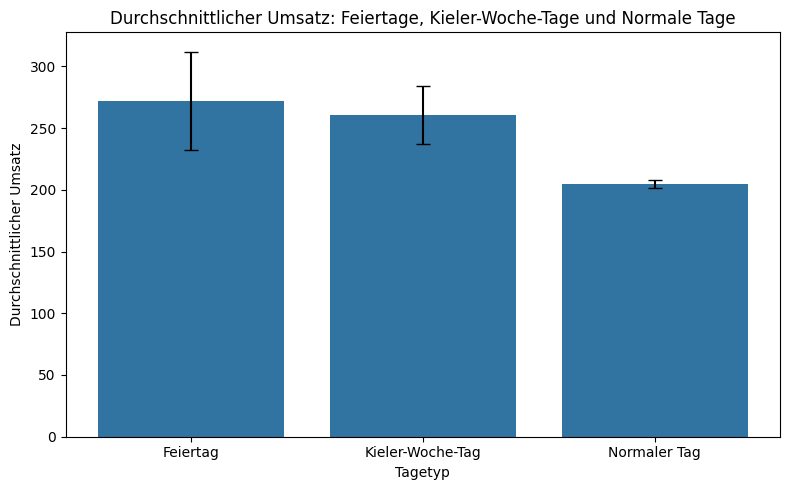

In [6]:
# Balkendiagramm mit Konfidenzintervallen
plt.figure(figsize=(8, 5))
sns.barplot(x=means_tage.index, y=means_tage.values, capsize=0.1)
plt.errorbar(x=range(len(means_tage)), y=means_tage.values, yerr=confidence_intervals_tage.values,
             fmt='none', ecolor='black', capsize=5)
plt.title("Durchschnittlicher Umsatz: Feiertage, Kieler-Woche-Tage und Normale Tage")
plt.xlabel("Tagetyp")
plt.ylabel("Durchschnittlicher Umsatz")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
